# Decision Tree

### Predictors: Quantitative Variables

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
student_por = pd.read_csv('student-por.csv',sep=';')
student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [3]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

### Numerical variables are extracted.

In [4]:
int_por = pd.DataFrame(student_por.select_dtypes(exclude=['object']))
int_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         649 non-null    int64
 1   Medu        649 non-null    int64
 2   Fedu        649 non-null    int64
 3   traveltime  649 non-null    int64
 4   studytime   649 non-null    int64
 5   failures    649 non-null    int64
 6   famrel      649 non-null    int64
 7   freetime    649 non-null    int64
 8   goout       649 non-null    int64
 9   Dalc        649 non-null    int64
 10  Walc        649 non-null    int64
 11  health      649 non-null    int64
 12  absences    649 non-null    int64
 13  G1          649 non-null    int64
 14  G2          649 non-null    int64
 15  G3          649 non-null    int64
dtypes: int64(16)
memory usage: 81.2 KB


## Building the model

In [5]:
predictors = pd.DataFrame(int_por[['failures', 'absences', 'G1', 'G2']]) #predictor
G3obj = pd.DataFrame((student_por['G3'] >= 10).replace({True: 'Pass', False: 'Fail'})) #response

In [6]:
predictors.head()

,failures,absences,G1,G2
0,0,4,0,11
1,0,2,9,11
2,0,6,12,13
3,0,0,14,14
4,0,0,11,13


In [7]:
G3obj.head()

,G3
0,Pass
1,Pass
2,Pass
3,Pass
4,Pass


In [8]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the Dataset into Train and Test
pred_train, pred_test, G3_train, G3_test = train_test_split(predictors, G3obj, test_size = 0.25)

# Check the sample sizes
print("Train Set :", G3_train.shape, pred_train.shape)
print("Test Set  :", G3_test.shape, pred_test.shape)

Train Set : (486, 1) (486, 4)
Test Set  : (163, 1) (163, 4)


### G3 is split into pass or fail.

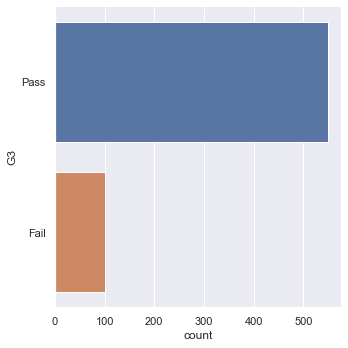

In [9]:
# Draw the distribution of Response
sb.catplot(y = "G3", data = G3obj, kind = "count")

### A decision tree of depth 4 is used.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9547325102880658

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9141104294478528



<AxesSubplot:>

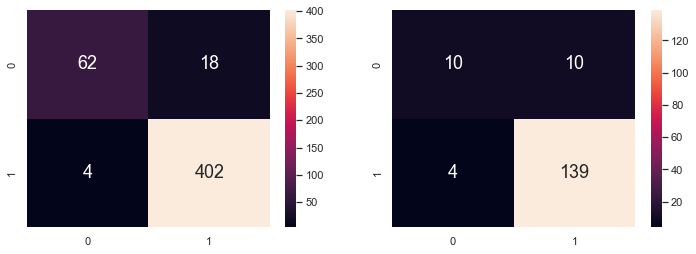

In [10]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(pred_train, G3_train)  # train the decision tree model

# Predict Response corresponding to Predictors
G3_train_pred = dectree.predict(pred_train)
G3_test_pred = dectree.predict(pred_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(pred_train, G3_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(pred_test, G3_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(G3_train, G3_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(G3_test, G3_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(1767.7440000000001, 3522.5280000000002, 'G2 <= 8.5\ngini = 0.275\nsamples = 486\nvalue = [80, 406]\nclass = Fail'),
 Text(803.52, 2739.744, 'G1 <= 8.5\ngini = 0.124\nsamples = 60\nvalue = [56, 4]\nclass = Pass'),
 Text(321.408, 1956.96, 'G1 <= 7.5\ngini = 0.042\nsamples = 47\nvalue = [46, 1]\nclass = Pass'),
 Text(160.704, 1174.176, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]\nclass = Pass'),
 Text(482.112, 1174.176, 'G2 <= 7.5\ngini = 0.111\nsamples = 17\nvalue = [16, 1]\nclass = Pass'),
 Text(321.408, 391.3920000000003, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = Pass'),
 Text(642.816, 391.3920000000003, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = Pass'),
 Text(1285.632, 1956.96, 'failures <= 2.0\ngini = 0.355\nsamples = 13\nvalue = [10, 3]\nclass = Pass'),
 Text(1124.928, 1174.176, 'G1 <= 9.5\ngini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = Pass'),
 Text(964.224, 391.3920000000003, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]\nclass = Pass'),
 Text(1285.632, 39

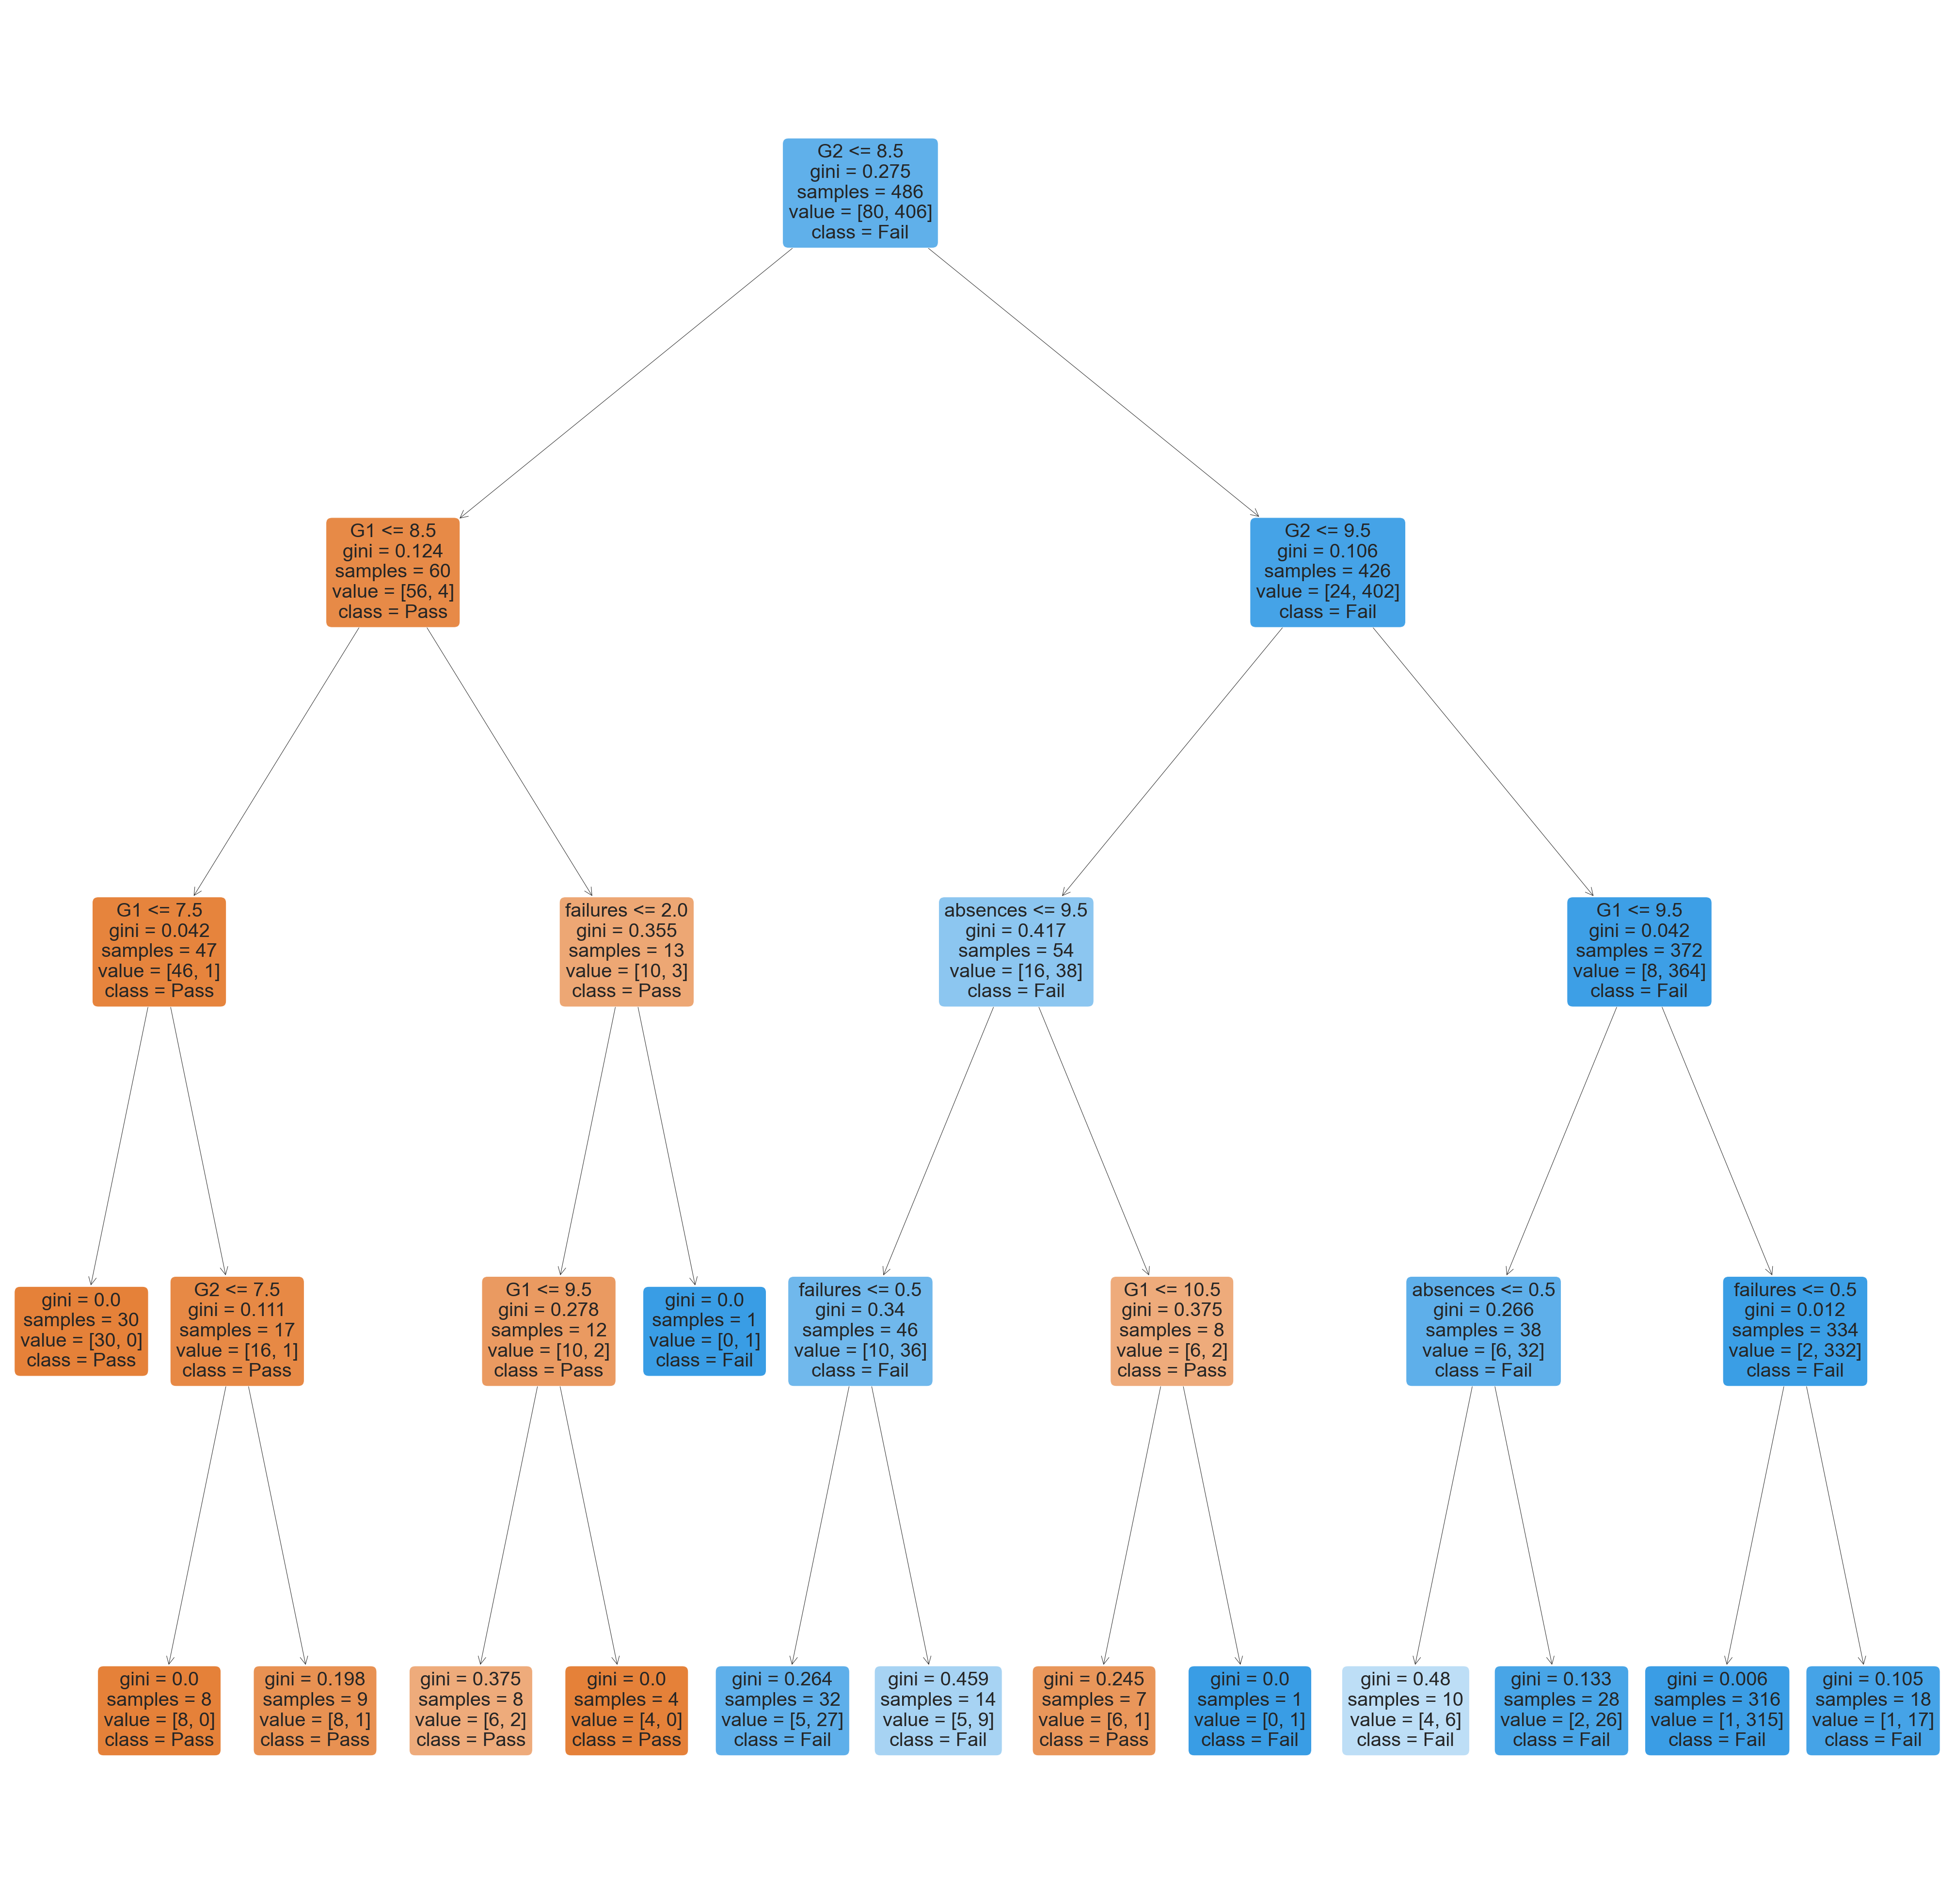

In [11]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(72, 72))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=pred_train.columns, 
          class_names=["Pass", "Fail"])

------------------------------------------------------------------------------------------------------------------------

### G3 is split into 4 bands.

In [12]:
G3 = pd.DataFrame(student_por['G3'])

G3Band = pd.DataFrame()

G3Band['G3'] = pd.DataFrame(student_por['G3']).replace([0, 1, 2, 3, 4], 'Band 1')
G3Band['G3'] = pd.DataFrame(G3Band['G3']).replace([5, 6, 7, 8, 9], 'Band 2')
G3Band['G3'] = pd.DataFrame(G3Band['G3']).replace([10, 11, 12, 13, 14], 'Band 3')
G3Band['G3'] = pd.DataFrame(G3Band['G3']).replace([15, 16, 17, 18, 19], 'Band 4')

G3Band

,G3
0,Band 3
1,Band 3
2,Band 3
3,Band 3
4,Band 3
...,...
644,Band 3
645,Band 4
646,Band 2
647,Band 3


In [13]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the Dataset into Train and Test
pred_train, pred_test, G3Band_train, G3Band_test = train_test_split(predictors, G3Band, test_size = 0.25)

# Check the sample sizes
print("Train Set :", G3Band_train.shape, pred_train.shape)
print("Test Set  :", G3Band_test.shape, pred_test.shape)

Train Set : (486, 1) (486, 4)
Test Set  : (163, 1) (163, 4)


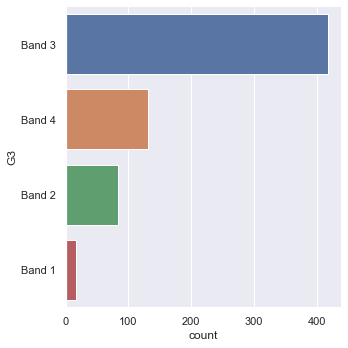

In [14]:
# Draw the distribution of Response
sb.catplot(y = "G3", data = G3Band, kind = "count")

### A decision tree of depth 4 is used.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8847736625514403

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9079754601226994



<AxesSubplot:>

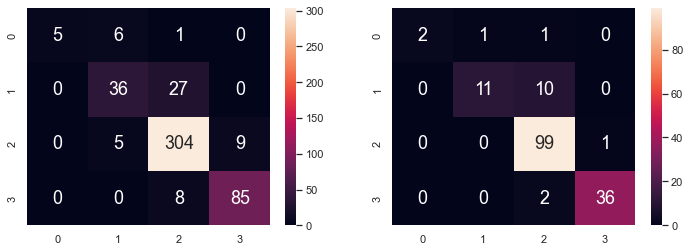

In [15]:
# Decision Tree using Train Data
dectreeBand = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectreeBand.fit(pred_train, G3Band_train)  # train the decision tree model

# Predict Response corresponding to Predictors
G3Band_train_pred = dectreeBand.predict(pred_train)
G3Band_test_pred = dectreeBand.predict(pred_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectreeBand.score(pred_train, G3Band_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectreeBand.score(pred_test, G3Band_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(G3Band_train, G3Band_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(G3Band_test, G3Band_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [38]:
conf_mat = np.array(
    [[2, 1, 1, 0],
    [0, 11, 10, 0],
    [0, 0, 99, 1],
    [0, 0, 2, 36]])

In [39]:
def get_tpr_fnr_fpr_tnr(cm):
    """
    This function returns class-wise TPR, FNR, FPR & TNR
    [[cm]]: a 2-D array of a multiclass confusion matrix
            where horizontal axes represent actual classes
            and vertical axes represent predicted classes
    {output}: a dictionary of class-wise accuracy parameters
    """
    dict_metric = dict()
    n = len(cm[0])
    row_sums = cm.sum(axis=1)
    col_sums = cm.sum(axis=0)
    array_sum = sum(sum(cm))
    #initialize a blank nested dictionary
    for i in range(1, n+1):
        keys = str(i)
        dict_metric[keys] = {"TPR":0, "FNR":0, "FPR":0, "TNR":0}
    # calculate and store class-wise TPR, FNR, FPR, TNR
    for i in range(n):
        for j in range(n):
            if i == j:
                keys = str(i+1)
                tp = cm[i, j]
                fn = row_sums[i] - cm[i, j]
                dict_metric[keys]["TPR"] = tp / (tp + fn)
                dict_metric[keys]["FNR"] = fn / (tp + fn)
                fp = col_sums[i] - cm[i, j]
                tn = array_sum - tp - fn - fp
                dict_metric[keys]["FPR"] = fp / (fp + tn)
                dict_metric[keys]["TNR"] = tn / (fp + tn)
    return dict_metric

In [40]:
df = pd.DataFrame(get_tpr_fnr_fpr_tnr(conf_mat)).transpose()
df

,TPR,FNR,FPR,TNR
1,0.500000,0.500000,0.000000,1.000000
2,0.523810,0.476190,0.007042,0.992958
3,0.990000,0.010000,0.206349,0.793651
4,0.947368,0.052632,0.008000,0.992000


[Text(1818.3103448275863, 2935.44, 'G2 <= 13.5\ngini = 0.518\nsamples = 486\nvalue = [12, 63, 318, 93]\nclass = Band 3'),
 Text(923.5862068965517, 2283.12, 'G2 <= 8.5\ngini = 0.341\nsamples = 378\nvalue = [12, 63, 300, 3]\nclass = Band 3'),
 Text(461.7931034482759, 1630.8000000000002, 'absences <= 1.0\ngini = 0.491\nsamples = 55\nvalue = [11, 37, 7, 0]\nclass = Band 2'),
 Text(230.89655172413794, 978.48, 'G2 <= 3.0\ngini = 0.571\nsamples = 21\nvalue = [11, 8, 2, 0]\nclass = Band 1'),
 Text(115.44827586206897, 326.1600000000003, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0, 0]\nclass = Band 1'),
 Text(346.3448275862069, 326.1600000000003, 'gini = 0.594\nsamples = 16\nvalue = [6, 8, 2, 0]\nclass = Band 2'),
 Text(692.6896551724138, 978.48, 'absences <= 13.0\ngini = 0.251\nsamples = 34\nvalue = [0, 29, 5, 0]\nclass = Band 2'),
 Text(577.2413793103449, 326.1600000000003, 'gini = 0.175\nsamples = 31\nvalue = [0, 28, 3, 0]\nclass = Band 2'),
 Text(808.1379310344828, 326.1600000000003, 'gini = 

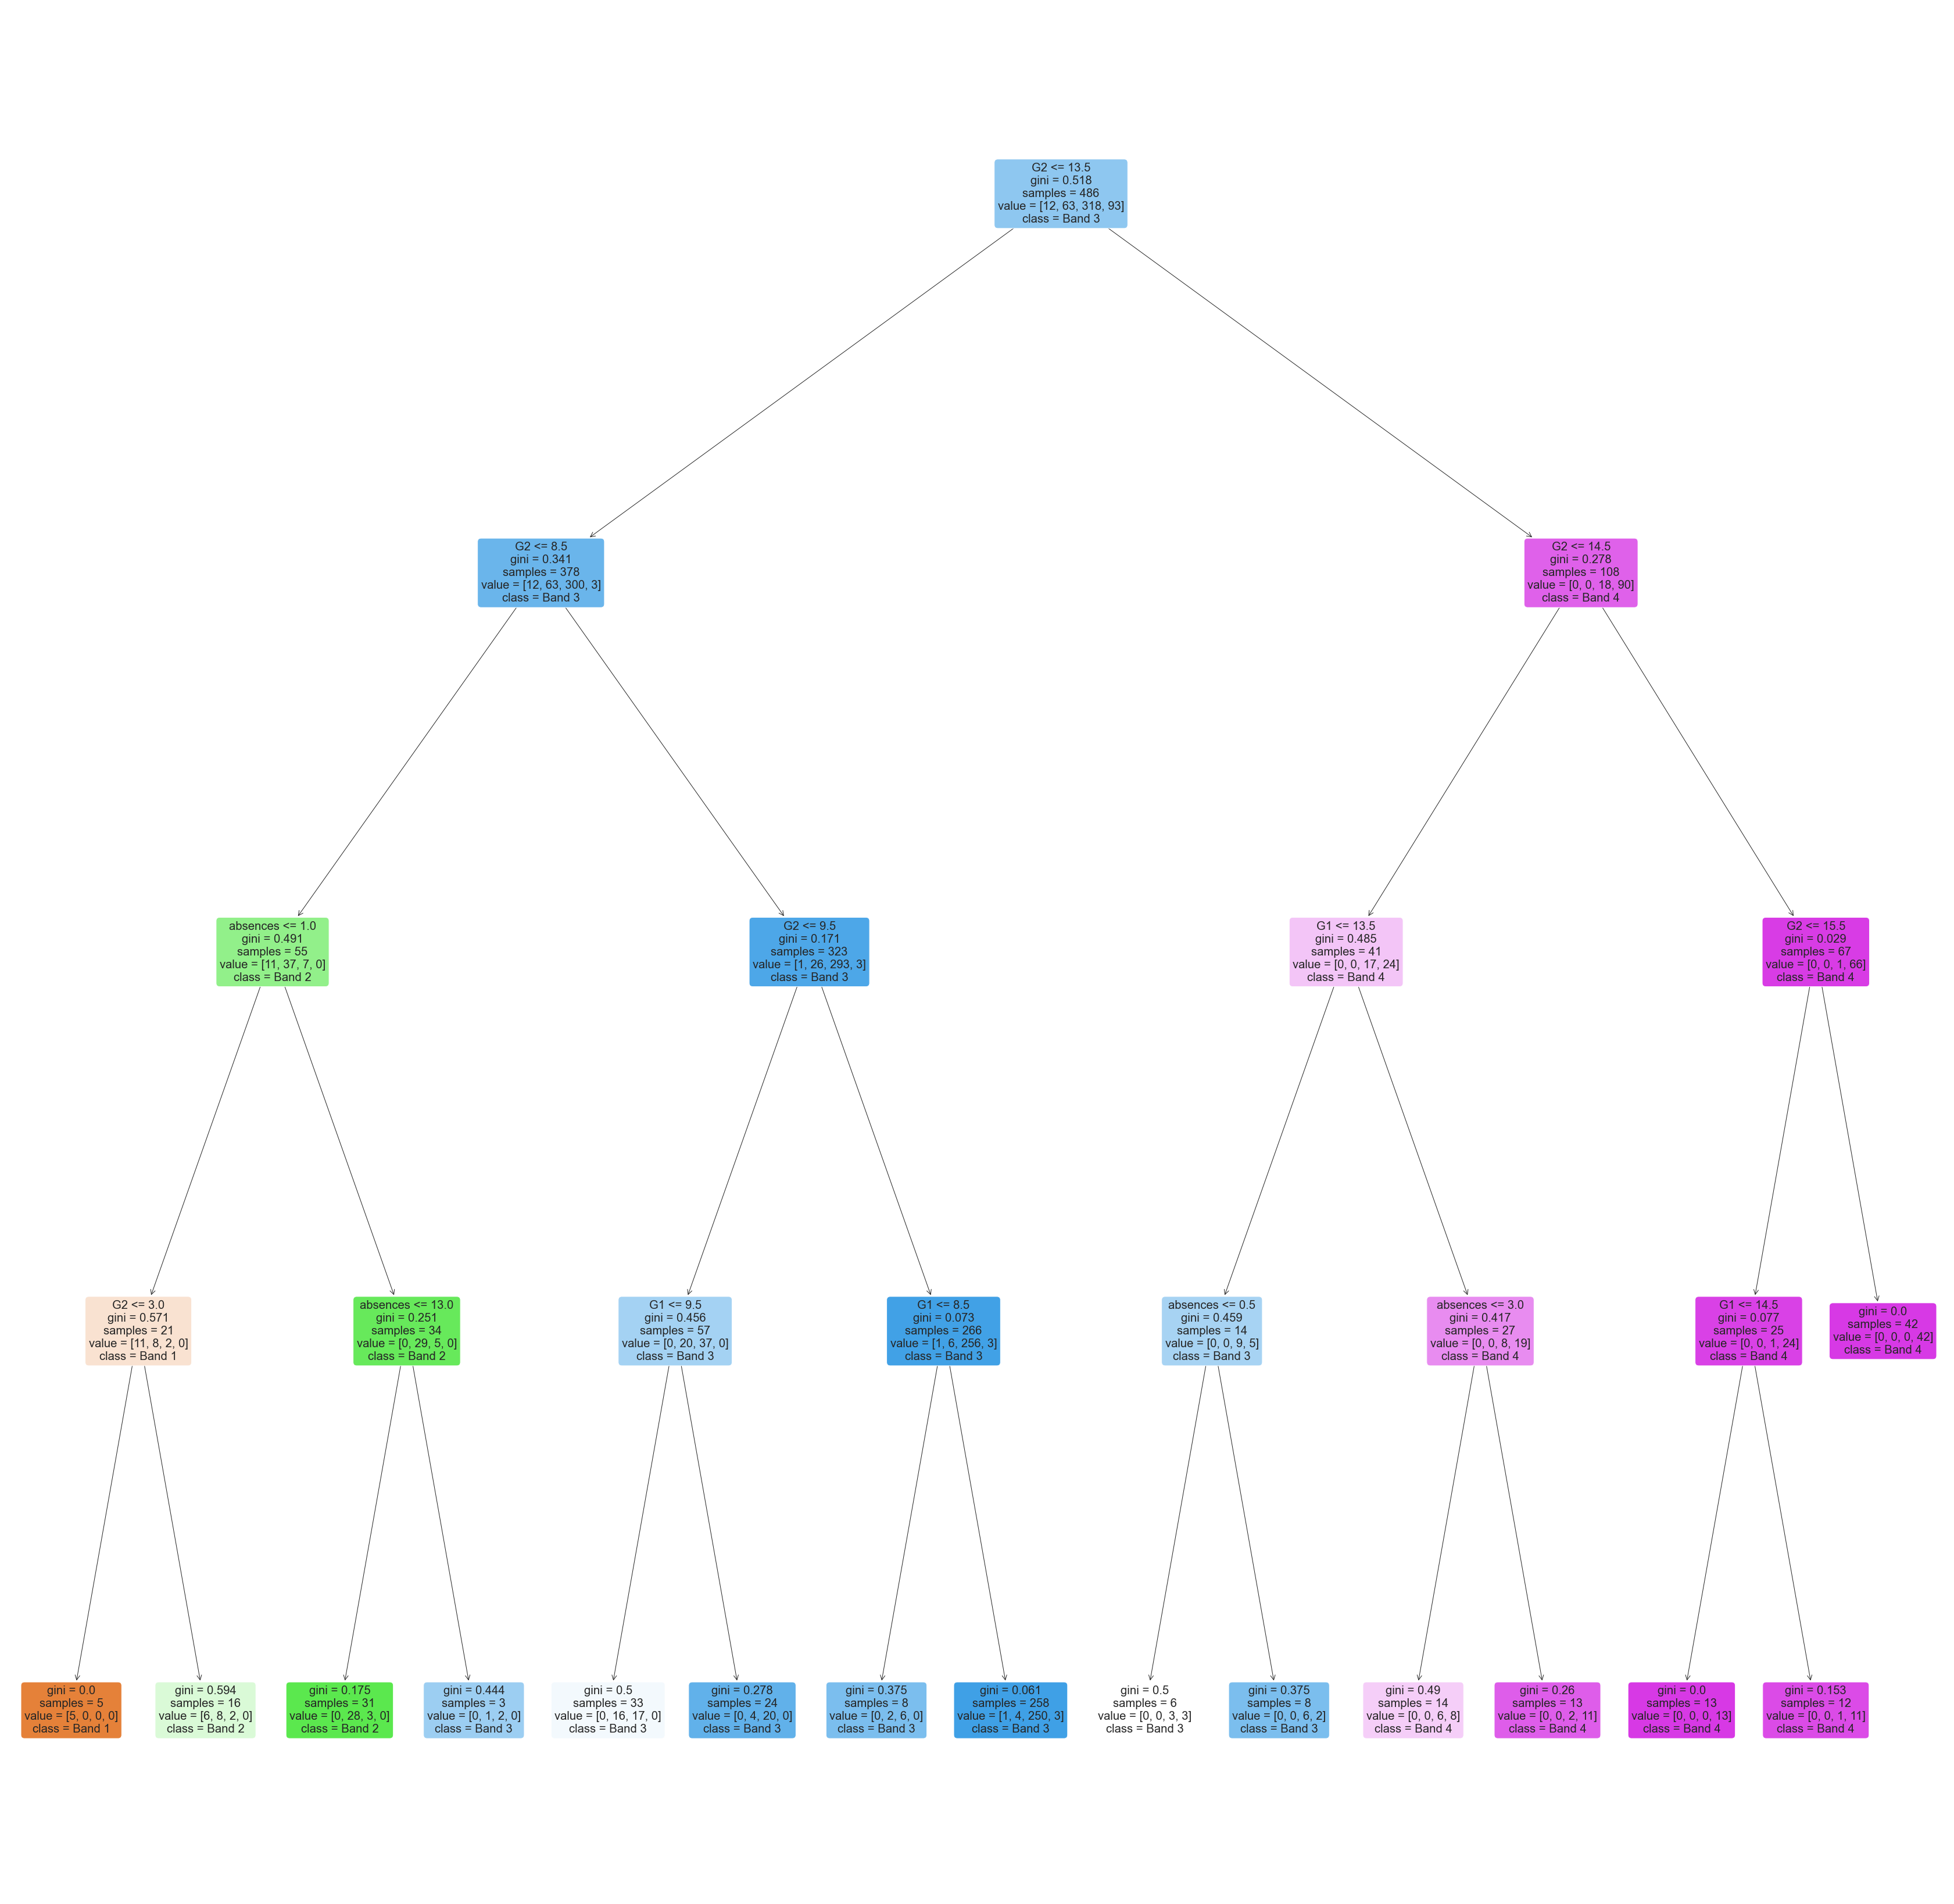

In [16]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(60, 60))
plot_tree(dectreeBand, filled=True, rounded=True, 
          feature_names=pred_train.columns, 
          class_names=["Band 1", "Band 2", "Band 3", "Band 4"])